In [2]:
from dlc_practical_prologue import *
from utils import *
import torch
import torch.nn as nn

In [3]:
train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)

In [4]:
class Try_Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.activation = nn.ReLU()
        
        self.conv1 = nn.Conv2d(in_channels = 2, out_channels=4, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels = 4, out_channels=8, kernel_size=3)
        
        self.fcout = nn.Linear(8*10*10, 2)
        
        
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.fcout(x.view(x.size(0), -1))
        
        return x

In [6]:
model = Try_Model()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [7]:
metrics = many_trains(Try_Model, criterion, optimizer, train_input, train_target, test_input, test_target, 100, 5)

Training 1: Final accuracy: 71.60%, Best Accuracy: 71.80%
Training 2: Final accuracy: 72.70%, Best Accuracy: 72.70%
Training 3: Final accuracy: 72.10%, Best Accuracy: 72.10%
Training 4: Final accuracy: 73.60%, Best Accuracy: 73.60%
Training 5: Final accuracy: 69.30%, Best Accuracy: 69.70%


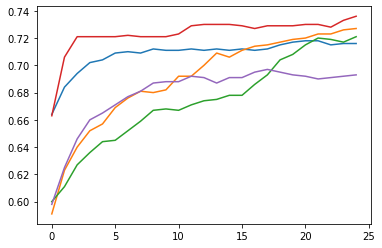

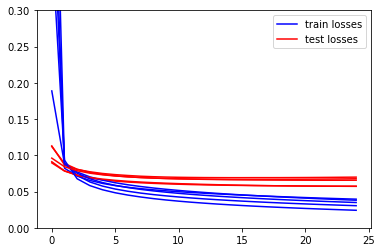

In [16]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot(metrics.accuracies[i])
plt.show()

for i in range(5):
    plt.plot(metrics.train_losses[i], color = 'b')
    plt.plot(metrics.test_losses[i], color = 'r')
    plt.ylim(0.0, 0.3)
    plt.legend(['train losses', 'test losses'])